In [1]:
import os
import copy

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [2]:
os.chdir('..')
import manifold_methods
import plotting
import mappings
import data_loader

In [3]:
# Load HGDP
exp_path = '/lustre06/project/6065672/shared/DietNet/1KGB_POP24/HGDP_sub/'
fname = 'gnomad.genomes.v3.1.2.hgdp_tgp.PASSfiltered.newIDs.onlySNPs.noDuplicatePos.noMiss5perc.match1000G_GSAs_dietnet.hdf5'
metadata_file = 'labels.tsv'
unrelated_sampleid_1000G_path = '/lustre06/project/6065672/grenier2/DietNet/Generalisation/datasets_112023/HGDP_1KGP/1000G_unrelated_samples_set_2504.txt'
data_path = os.path.join(exp_path, fname)
metadata_path = os.path.join(exp_path, metadata_file)

inputs, class_labels, sample, snp_names, class_label_names, metadata_labels = data_loader.load_data_HDGP(data_path, metadata_path, unrelated_sampleid_1000G_path)

Removed 701 related individuals


In [4]:
#np.save('inputs_hgdp', inputs)
#metadata_labels.to_csv('metadata_labels_hgdp')
#pd.DataFrame(sample).to_csv('samples')

In [5]:
def make_palette_label_order_HGDP(metadata_labels):
    # SAS -> CSA + add MID, OCE
    pop_palette_hgdp_coarse = copy.deepcopy(mappings.pop_pallette_1000G_coarse)
    pop_palette_hgdp_coarse['CSA'] = mappings.pop_pallette_1000G_coarse['SAS']
    pop_palette_hgdp_coarse.pop('SAS')

    pop_palette_hgdp_coarse['MID'] = 'grey'
    pop_palette_hgdp_coarse['OCE'] = 'yellow'

    label_order_hgdp_coarse = copy.deepcopy(mappings.label_order_1000G_coarse)
    label_order_hgdp_coarse.remove('SAS')
    label_order_hgdp_coarse += ['CSA', 'MID', 'OCE']

    # Keep original 24/26 populations (with colors), and add new ones. New pops colored using superpop
    label_order_hgdp_fine = []
    for super_pop in np.unique(metadata_labels['Superpopulation']):
        for pop in np.unique(metadata_labels['Population'][metadata_labels['Superpopulation']==super_pop]):
            label_order_hgdp_fine.append(pop)

    # create tmp object to hold the original 26 populations
    mapping_26 = copy.deepcopy(mappings.pop_pallette_1000G_fine)
    mapping_26['GBR'] = mapping_26['CEUGBR']
    mapping_26['CEU'] = mapping_26['CEUGBR']
    mapping_26['STU'] = mapping_26['STUITU']
    mapping_26['ITU'] = mapping_26['STUITU']

    pop_palette_hgdp_fine = {}

    for super_pop in np.unique(metadata_labels['Superpopulation']):
        for pop in np.unique(metadata_labels['Population'][metadata_labels['Superpopulation']==super_pop]):
            if pop not in mapping_26.keys():
                # just use superpop color for now
                pop_palette_hgdp_fine[pop] = pop_palette_hgdp_coarse[super_pop]
            else:
                pop_palette_hgdp_fine[pop] = mapping_26[pop]

    return pop_palette_hgdp_coarse, pop_palette_hgdp_fine, label_order_hgdp_coarse, label_order_hgdp_fine

In [6]:
pop_palette_hgdp_coarse, pop_palette_hgdp_fine, label_order_hgdp_coarse, label_order_hgdp_fine = make_palette_label_order_HGDP(metadata_labels)

## Make PCA

In [7]:
pca_obj = sklearn.decomposition.PCA(n_components=100, random_state=42)
pca_input = pca_obj.fit_transform(inputs)

In [11]:
idx_ordered = []
for pop in label_order_hgdp_fine:
    pop_sample_id = metadata_labels[metadata_labels['Population'] == pop].index
    idx_ordered += pop_sample_id.tolist()

In [20]:
ordered_pca_input = pd.DataFrame(pca_input, index=sample).loc[idx_ordered].values

In [26]:
dists = pdist(ordered_pca_input)

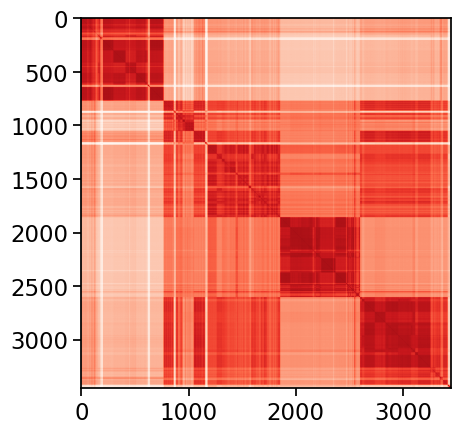

In [30]:
plt.imshow(squareform(dists), cmap='Reds_r', vmin=0, vmax=300)

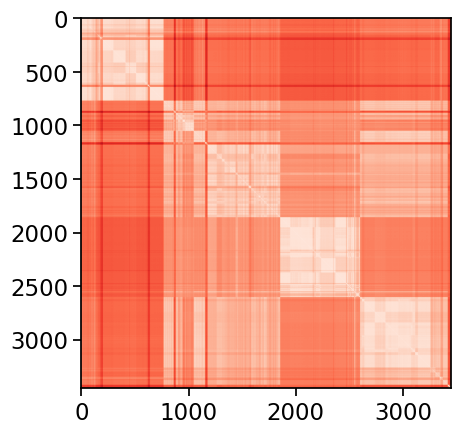

In [73]:
plt.imshow(squareform(dists), cmap='Reds')

In [55]:
label_order_hgdp_fine2 = copy.deepcopy(label_order_hgdp_fine)

outlier_pops = ['Kalash', 'MbutiPygmy', 'BiakaPygmy', 'Melanesian', 'Papuan',
                'Surui', 'Yakut', 'San', 'Karitiana', 'Pima', 'Lahu']
for outlier_pop in outlier_pops:
    label_order_hgdp_fine2.remove(outlier_pop)
label_order_hgdp_fine2 += outlier_pops

In [56]:
idx_ordered2 = []
for pop in label_order_hgdp_fine2:
    pop_sample_id = metadata_labels[metadata_labels['Population'] == pop].index
    idx_ordered2 += pop_sample_id.tolist()

In [57]:
ordered2_pca_input = pd.DataFrame(pca_input, index=sample).loc[idx_ordered2].values

In [58]:
dists2 = pdist(ordered2_pca_input)

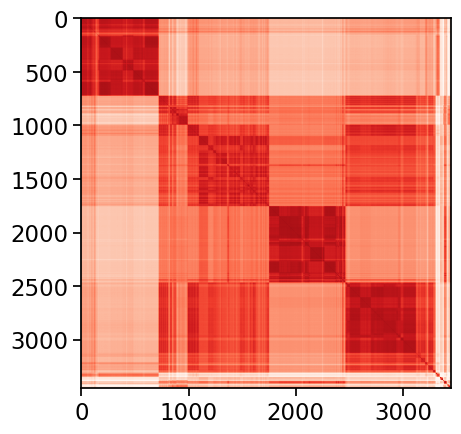

In [59]:
plt.imshow(squareform(dists2), cmap='Reds_r', vmin=0, vmax=300)

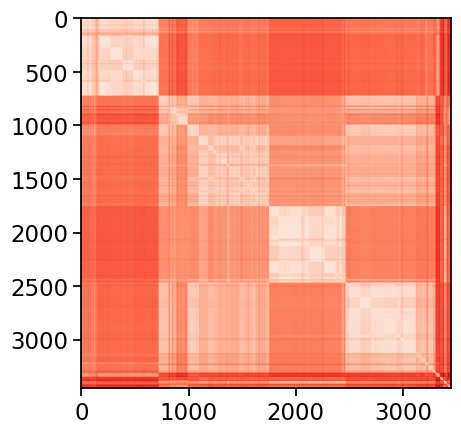

In [84]:
plt.imshow(squareform(dists2), cmap='Reds')

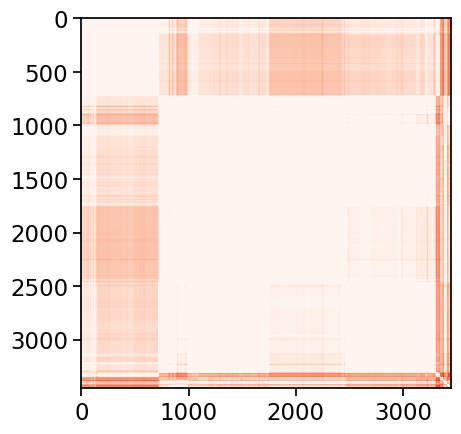

In [85]:
plt.imshow(squareform(dists2), cmap='Reds', vmin=180)